## Cover Difference Plot
This plot shows the difference in gene coverage between optimal vs real and random vs real. It does this by fitting a function to the simulated random/optimal data, and using that fuction to compare the values of real coverage bs simulated coverage. The calc_random_diff() and calc_optimal_diff()

In [1]:
import numpy as np
import glob
import os
import ast
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
def calc_random_diff(genome_filename, mature_filename, canon_site, v_subset):
    #load random simulation data into dictionary
    data_r = {}
    new_file_path = "Simulated Random Coverage/"+genome_filename+"_simulation/Canon Site "+canon_site
    for ID in glob.glob(os.path.join(new_file_path, '*.txt')):
           with open(os.path.join(os.getcwd(), ID), 'r') as f:
                data_r[int(os.path.basename(ID).split('/')[-1].strip(".tx"))] = (ast.literal_eval(f.read()))
                
    #sort dictionary
    keys_r = list(data_r.keys())
    keys_r.sort()
    data_r = {i: data_r[i] for i in keys_r}
    
    #generate means points (to plot line through boxplots)
    x = []
    y = []
    for i in data_r:
        x.append(i) 
        y.append(sum(data_r[i])/len(data_r[i]))
        
    #find the best fit using the generalized logistic function 
    #check https://en.wikipedia.org/wiki/Generalised_logistic_function for more info
    #In this variant of the generalized logistic, here are what the variables represent:
    #𝑎:the lower asymptote
    #𝑏:the Hill coefficient, i.e. the steepness of the slope in the linear portion of the sigmoid
    #𝑐:the 𝑥 value of the middle of the the linear portion of the curve
    #𝑑:the upper asymptote
    #𝑔:asymmetry factor - set to 0.5 initially
    def glf(x, a, b, c, d, g):
        return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
    popt, pcov = curve_fit(glf, x, y, p0=[0,1,np.quantile(x,.25),np.max(y),.4], maxfev=3000)
    
    #plt.plot(x,y, label = "Random")
    #plt.plot(x,glf(x,*popt),label = "Aprx Random")
    #plt.legend()

    #load real coverage number and return result
    new_file_path = "Real Coverage/"+mature_filename+"/Canon Site "+canon_site
    if v_subset == 'Norm' or v_subset == 'Pre' or v_subset == 'Post':
        with open(new_file_path+"/"+v_subset+"_v.txt", 'r') as f:
            n = ast.literal_eval(f.read())
    else:
        print("ERROR: Invalid v_subset")
        return

    
    return glf(n[0],*popt)

In [3]:
def calc_optimal_diff(genome_filename, mature_filename, canon_site, v_subset):
    #load optimal simulation data into dictionary
    data_r = {}
    new_file_path = "Simulated Optimal Coverage/"+genome_filename+"_simulation/Canon Site "+canon_site
    for ID in glob.glob(os.path.join(new_file_path, '*.txt')):
           with open(os.path.join(os.getcwd(), ID), 'r') as f:
                data_r[int(os.path.basename(ID).split('/')[-1].strip(".tx"))] = (ast.literal_eval(f.read()))
                
    #sort dictionary
    keys_r = list(data_r.keys())
    keys_r.sort()
    data_r = {i: data_r[i] for i in keys_r}
    
    #generate means points (to plot line through boxplots)
    x = []
    y = []
    for i in data_r:
        x.append(i) 
        y.append(sum(data_r[i])/len(data_r[i]))
        
    #find the best fit using the generalized logistic function 
    def glf(x, a, b, c, d, g):
        return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
    popt, pcov = curve_fit(glf, x, y, p0=[0,1,np.quantile(x,.25),np.max(y),.4], maxfev=10000)
    
    #plt.plot(x,y, label = "Optimal")
    #plt.plot(x,glf(x,*popt), label = "Aprx Optimal")
    #plt.legend()

    #load real coverage number and return result
    new_file_path = "Real Coverage/"+mature_filename+"/Canon Site "+canon_site
    if v_subset == 'Norm' or v_subset == 'Pre' or v_subset == 'Post':
        with open(new_file_path+"/"+v_subset+"_v.txt", 'r') as f:
            n = ast.literal_eval(f.read())
    else:
        print("ERROR: Invalid v_subset")
        return

    
    return glf(n[0],*popt)

In [58]:
species_list = [
    #invertabrates
    ('Caenorhabditis elegans (PRJNA13758) genes (WBcel235)','Roundworm (Caenorhabditis elegans)'),
    ('Drosophila melanogaster (Fruit fly) genes (BDGP6.46)','Fruit fly (Drosophila melanogaster)'),
    #additional inveratbrates
    ('Caenorhabditis briggsae genes','Roundworm (Caenorhabditis briggsae)'),
    ('Ciona intestinalis genes', 'Sea Squirt (Ciona intestinalis)'),
    ('Drosophila ananassae genes','Fruit fly (Drosophila ananassae)'),
    ('Drosophila simulans genes', 'Fruit fly (Drosophila simulans)'),
    ('Drosophila yakuba genes','Fruit fly (Drosophila yakuba)'),
    ('Octopus bimaculoides (California two-spot octopus, UCB-OBI-ISO-001)', 'California two-spot octopus (Octopus bimaculoides)'),
    #('Strongylocentrotus purpuratus genes', 'Purple sea urchin (Strongylocentrotus purpuratus)'),
    #vertabrates
    ('Hagfish genes (Eburgeri_3.2)','Inshore hagfish (Eptatretus burgeri)'),
    ('Elephant shark genes (Callorhinchus_milii-6.1.3)','Australian ghostshark (Callorhinchus milii)'),
    ('Spotted gar genes (LepOcu1)','Spotted gar (Lepisosteus oculatus)'),
    ('Zebrafish genes (GRCz11)','Zebrafish (Danio rerio)'),
    ('Atlantic cod genes (gadMor3.0)','Cod (Gadus morhua)'),
    ('Coelacanth genes (LatCha1)','Coelacanth (Latimeria chalumnae)'),
    ('Tropical clawed frog genes (Xenopus_tropicalis_v9.1)','Tropical clawed frog (Xenopus tropicalis)'),
    ('Tuatara genes (ASM311381v1)','Tuatara (Sphenodon punctatus)'),
    ('Green anole genes (AnoCar2.0v2)','Green anole lizard (Anolis carolinensis)'),
    ('Painted turtle genes (Chrysemys_picta_bellii-3.0.3)','Western painted turtle (Chrysemys picta bellii)'),
    ('Zebra finch genes (bTaeGut1_v1.p)','Zebra finch (Taeniopygia guttata)'),
    ('Chicken (maternal Broiler) genes (bGalGal1.mat.broiler.GRCg7b)','Chicken (Gallus gallus)'),
    ('Platypus genes (mOrnAna1.p.v1)','Platypus (Ornithorhynchus anatinus)'),
    ('Opossum genes (ASM229v1)','Gray short-tailed opossum (Monodelphis domestica)'),
    ('Armadillo genes (Dasnov3.0)','Nine-banded armadillo (Dasypus novemcinctus)'),
    ('Cow genes (ARS-UCD1.2)','Cow (Bos taurus)'),
    ('Dog genes (ROS_Cfam_1.0)','Dog (Canis familiaris)'),
    ('Rabbit genes (OryCun2.0)','Rabbit (Oryctolagus cuniculus)'),
    ('Guinea Pig genes (Cavpor3.0)','Guinea pig (Cavia porcellus)'),
    ('Rat genes (mRatBN7.2)','Norway rat (Rattus norvegicus)'),
    ('Mouse genes (GRCm39)','House mouse (Mus musculus)'),
    ('Human genes (GRCh38.p13)','Human (Homo sapiens)'),
    ('Human TargetScan','Human (Homo sapiens) TargetScan')
]

In [9]:
species_list = [
    ('Human genes (GRCh38.p13)','Human (Homo sapiens)'),
    ("neoechinorhynchus_agilis","Thorny-headed worm 1 (Neoechinorhynchus agilis)"),
    ('Caenorhabditis elegans (PRJNA13758) genes (WBcel235)','Roundworm (Caenorhabditis elegans)'),
]

In [5]:
def plot_difference_old(canon_site, v_subset):
    x = []
    y_rand = []
    y_opt = []
    UTR_data = pd.read_csv("3UTR Data.csv")
    UTR_Number = UTR_data["Gene Number"]
    
    #retrieving data
    for species in species_list:
        y_real = 0
        new_file_path = "Real Coverage/"+species[1]+"/Canon Site "+canon_site
        with open(new_file_path+"/Norm_v.txt", 'r') as f:
            data = ast.literal_eval(f.read())
            x.append(data[0])
            y_real = data[1]
        diff_rand = (calc_random_diff(species[0],species[1], canon_site, v_subset) - y_real) / UTR_Number[UTR_data['Species'] == species[1]].item()
        diff_opt = (calc_optimal_diff(species[0],species[1], canon_site, v_subset) - y_real) / UTR_Number[UTR_data['Species'] == species[1]].item()
        #print(species[0]+" ; "+canon_site+" ; "+str(diff_rand)+" ; "+str(diff_opt))
        y_rand.append(diff_rand)
        y_opt.append(diff_opt)

    #save data to csv
    data = {'Species': species_list,
        'Optimal Difference': y_opt,
        'Random Difference': y_rand}
    
    #figure
    plt.figure(figsize=(10,10))
    plt.title("Cover Difference Plot (Canon Site"+canon_site+") "+v_subset)
    plt.rcParams['svg.fonttype'] = 'none'
    
    #plot scatter
    plt.vlines(x, 0, y_rand, linestyle="dashed", color = '#cb275a')
    plt.scatter(x, y_rand, label='Random Seed', color = '#cb275a')
    
    plt.vlines(x, 0, y_opt, linestyle="dashed", color = '#f3b432')
    plt.scatter(x, y_opt, label='Optimal Seed', color = '#f3b432')
    
    plt.plot(x, np.zeros(len(x)), color = 'black')
    for i in range(len(x)):
        plt.text(x=x[i], y=y_opt[i], s=species_list[i][0], 
                 fontdict=dict(color='black',size=5),rotation=45, va='center')
    
    #legend
    plt.legend()
    
    #save figure
    new_file_path = "Plot Images/"
    if not os.path.exists(new_file_path):
        os.makedirs(new_file_path)
    plt.savefig("Plot Images/"+"Cover Difference Plot (Canon Site "+canon_site+") "+v_subset+".svg", dpi=120)
    pd.DataFrame(data).to_csv("CSV Data/"+"Difference Data (site "+canon_site+" ).csv")
    plt.show()

In [7]:
def plot_difference(canon_site, v_subset):
    x = []
    y_rand_p = []
    y_opt_p = []
    y_rand_abs = []
    y_opt_abs = []
    species_names = []
    UTR_data = pd.read_csv("3UTR Data.csv")
    UTR_Number = UTR_data["Gene Number"]
    
    #retrieving data
    for species in species_list:
        y_real = 0
        new_file_path = "Real Coverage/"+species[1]+"/Canon Site "+canon_site
        with open(new_file_path+"/Norm_v.txt", 'r') as f:
            data = ast.literal_eval(f.read())
            x.append(data[0])
            y_real = data[1]
        diff_rand_percent = (calc_random_diff(species[0],species[1], canon_site, v_subset) - y_real) / UTR_Number[UTR_data['Species'] == species[1]].item()
        diff_opt_percent = (calc_optimal_diff(species[0],species[1], canon_site, v_subset) - y_real) / UTR_Number[UTR_data['Species'] == species[1]].item()
        diff_rand_absolute = (calc_random_diff(species[0],species[1], canon_site, v_subset) - y_real).item()
        diff_opt_absolute = (calc_optimal_diff(species[0],species[1], canon_site, v_subset) - y_real).item()
        #print(species[0]+" ; "+canon_site+" ; "+str(diff_rand)+" ; "+str(diff_opt))
        y_rand_p.append(diff_rand_percent)
        y_opt_p.append(diff_opt_percent)
        y_rand_abs.append(diff_rand_absolute)
        y_opt_abs.append(diff_opt_absolute)
        species_names.append(species[1])

    #save data to csv
    data = {'Species': species_list,
        'Optimal Difference Percent': y_opt_p,
        'Random Difference Percent': y_rand_p,
        'Optimal Difference Absolute': y_opt_abs,
        'Random Difference Absolute': y_rand_abs}
    
    #normalize bars to be same height
    abs_y_rand_p = np.abs(y_rand_p)
    total = abs_y_rand_p + y_opt_p
    y_rand_p_norm = abs_y_rand_p / total
    y_opt_p_norm = y_opt_p / total
    
    #figure
    plt.figure(figsize=(20,15))
    plt.title("Cover Difference Plot (Canon Site "+canon_site+") "+v_subset)
    plt.rcParams['svg.fonttype'] = 'none'
    
    plt.bar(species_names, y_rand_p_norm, color='#f3b432')
    plt.bar(species_names, y_opt_p_norm, bottom=y_rand_p_norm, color = '#cb275a')

    #add numerical labels (this probably isn't the best way to do it but I'll do it anyways)
    for i in range(len(species_names)):
        plt.text(i, y_rand_p_norm[i] + (y_opt_p_norm[i] / 2), f"{y_opt_abs[i]:.0f}", ha='center')
        plt.text(i, y_rand_p_norm[i]/2, f"{y_rand_abs[i]:.0f}", ha='center')
    
    plt.xticks(rotation=45, ha='right')
    
    #save figure
    new_file_path = "Plot Images/"
    if not os.path.exists(new_file_path):
        os.makedirs(new_file_path)
    plt.savefig("Plot Images/"+"Cover Difference Plot (Canon Site "+canon_site+") "+v_subset+"_SYNDERMATA.svg", dpi=120)
    pd.DataFrame(data).to_csv("CSV Data/"+"Difference Data (site "+canon_site+" )_SYNDERMATA.csv")
    plt.show()

/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/1755737768.py:30: RuntimeWarning: divide by zero encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/1755737768.py:30: RuntimeWarning: invalid value encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/1755737768.py:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(glf, x, y, p0=[0,1,np.quantile(x,.25),np.max(y),.4], maxfev=3000)
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/3645026463.py:23: RuntimeWarning: divide by zero encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/3645026463.py:23: RuntimeWarning: invalid value encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/va

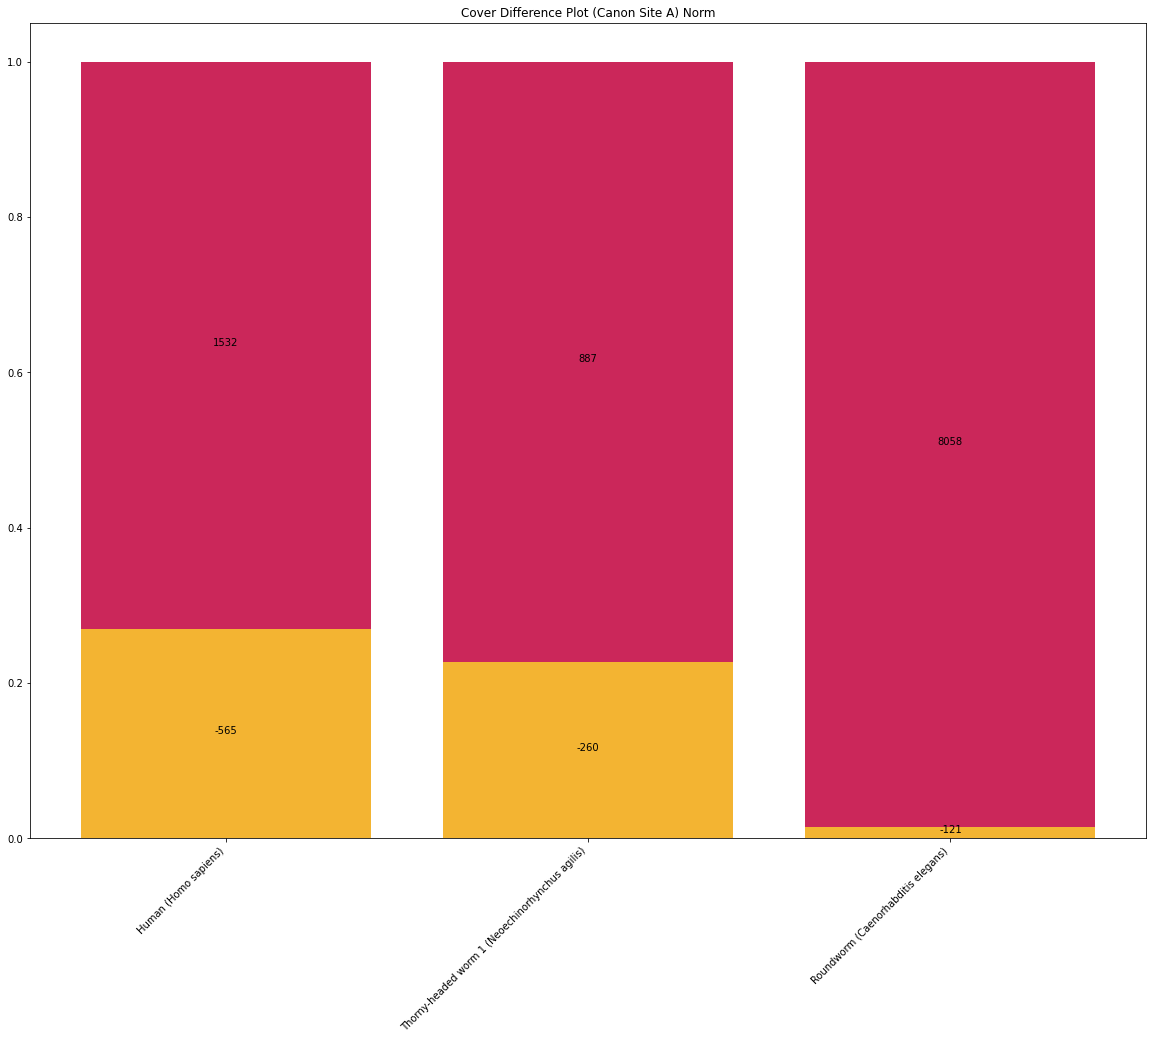

/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/1755737768.py:30: RuntimeWarning: divide by zero encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/1755737768.py:30: RuntimeWarning: invalid value encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/3645026463.py:23: RuntimeWarning: divide by zero encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/3645026463.py:23: RuntimeWarning: invalid value encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/1755737768.py:30: RuntimeWarning: overflow encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_6414

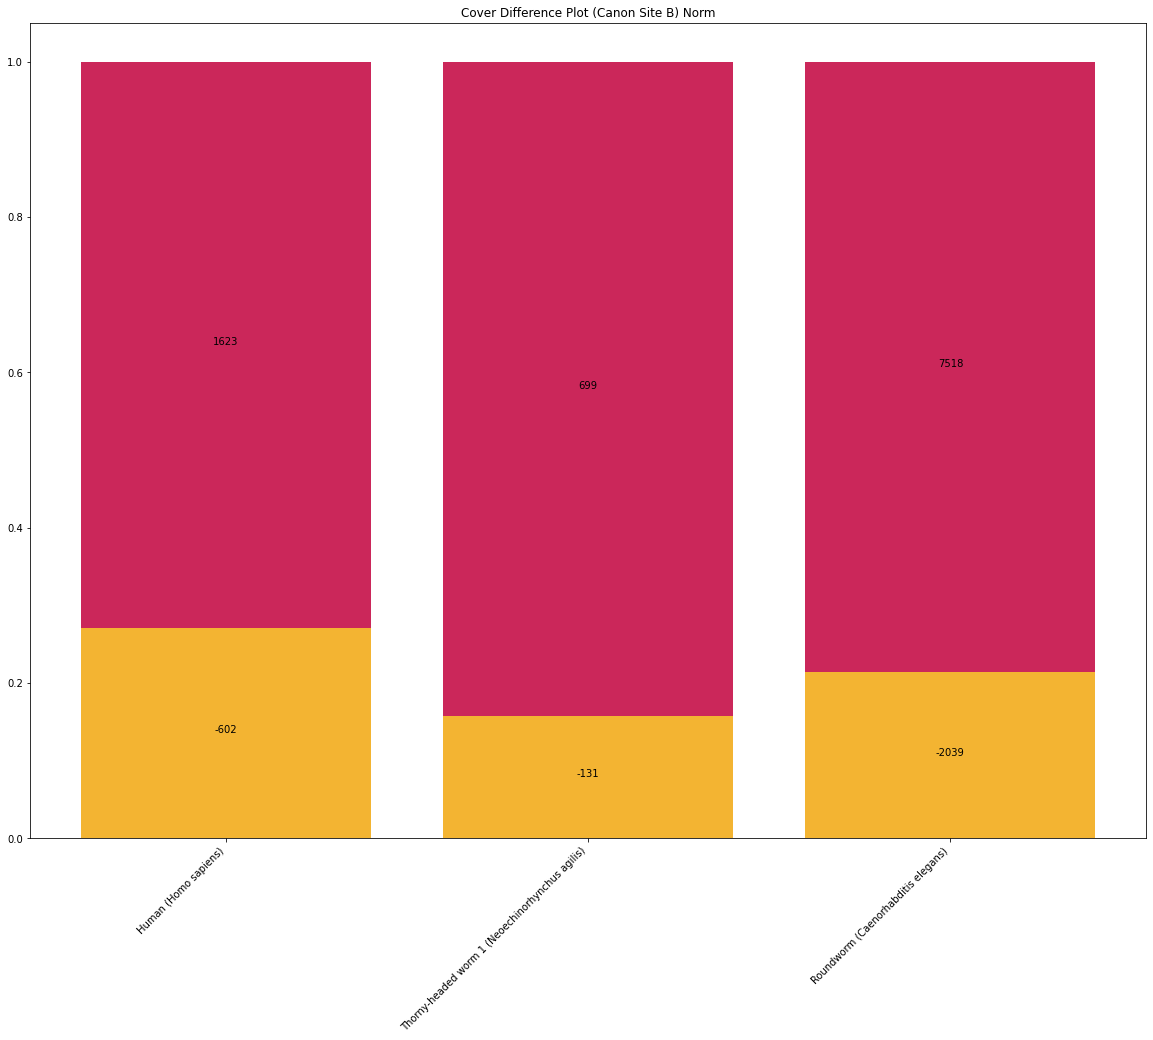

/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/1755737768.py:30: RuntimeWarning: divide by zero encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/1755737768.py:30: RuntimeWarning: invalid value encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/3645026463.py:23: RuntimeWarning: divide by zero encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_64145/3645026463.py:23: RuntimeWarning: invalid value encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )


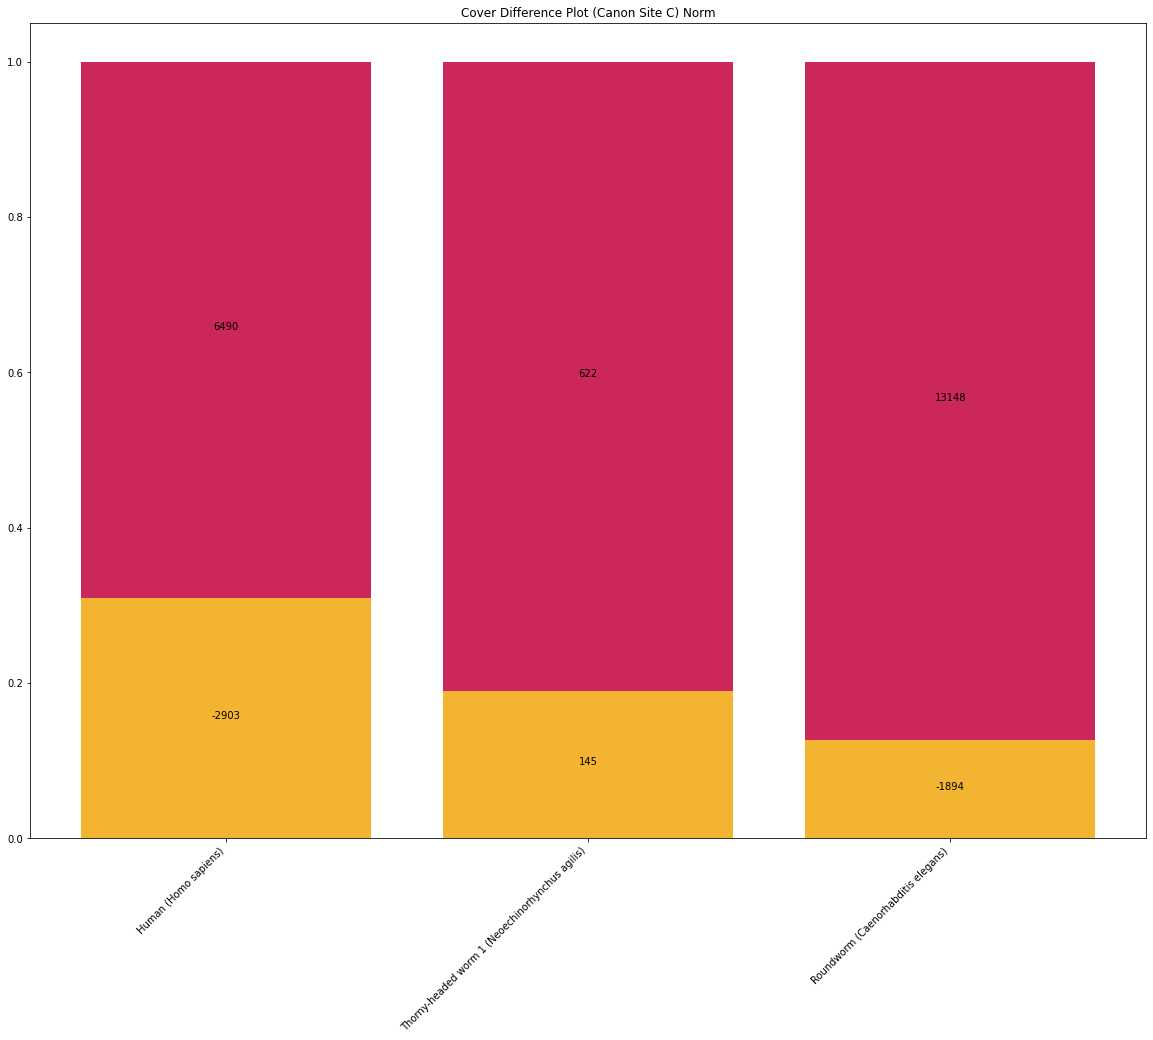

In [10]:
sites = ['A','B','C']
v_subset = 'Norm'
for site in sites:
    plot_difference(site, v_subset)